<a href="https://colab.research.google.com/github/choijuhe/jh/blob/main/12_14_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [226]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            torch.nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            torch.nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 64),
            torch.nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        #elu활성화함수 -> 86.3%
        #LeakyReLU활성화함수 -> 86.9%
        #ReLU활성화함수 -> 87.2%
        #learning_rate = 1e-4 -> 87.7~87.9%

In [227]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [228]:
model = NeuralNetwork()
model.to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [229]:
learning_rate = 1e-4
batch_size = 64
epochs = 5

In [230]:
loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [231]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        X, y = X.to(device), y.to(device)  # 데이터를 디바이스로 이동
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)  # 데이터를 디바이스로 이동
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [232]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.541204  [    0/60000]
loss: 1.021062  [ 6400/60000]
loss: 0.706562  [12800/60000]
loss: 0.818730  [19200/60000]
loss: 0.677384  [25600/60000]
loss: 0.604891  [32000/60000]
loss: 0.505499  [38400/60000]
loss: 0.567232  [44800/60000]
loss: 0.529442  [51200/60000]
loss: 0.521430  [57600/60000]
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.478136 

Epoch 2
-------------------------------
loss: 0.380198  [    0/60000]
loss: 0.416073  [ 6400/60000]
loss: 0.294031  [12800/60000]
loss: 0.415765  [19200/60000]
loss: 0.384881  [25600/60000]
loss: 0.385176  [32000/60000]
loss: 0.320353  [38400/60000]
loss: 0.390650  [44800/60000]
loss: 0.353328  [51200/60000]
loss: 0.402332  [57600/60000]
Test Error: 
 Accuracy: 86.8%, Avg loss: 0.389573 

Epoch 3
-------------------------------
loss: 0.250158  [    0/60000]
loss: 0.300268  [ 6400/60000]
loss: 0.211139  [12800/60000]
loss: 0.313618  [19200/60000]
loss: 0.310343  [25600/60000]
loss: 0.314487  [32000/600

value : tensor([3.7334], device='cuda:0', grad_fn=<MaxBackward0>), argmax : tensor([4], device='cuda:0') 
 tensor([[-2.4566, -4.0715,  1.4751, -0.8952,  3.7334, -3.0774,  2.2998, -3.4121,
         -3.6785, -3.7162]], device='cuda:0', grad_fn=<AddmmBackward0>)
value : tensor([2.2388], device='cuda:0', grad_fn=<MaxBackward0>), argmax : tensor([2], device='cuda:0') 
 tensor([[-0.0539, -2.6029,  2.2388, -2.7552, -0.9092, -3.4238,  0.9172, -4.3982,
         -0.8724, -4.0376]], device='cuda:0', grad_fn=<AddmmBackward0>)
value : tensor([3.9061], device='cuda:0', grad_fn=<MaxBackward0>), argmax : tensor([3], device='cuda:0') 
 tensor([[-1.5279, -3.2324, -1.2873,  3.9061,  1.7689, -3.9437,  0.0998, -3.5223,
         -2.8765, -2.7988]], device='cuda:0', grad_fn=<AddmmBackward0>)
value : tensor([2.2388], device='cuda:0', grad_fn=<MaxBackward0>), argmax : tensor([2], device='cuda:0') 
 tensor([[-0.0539, -2.6029,  2.2388, -2.7552, -0.9092, -3.4238,  0.9172, -4.3982,
         -0.8724, -4.0376]], dev

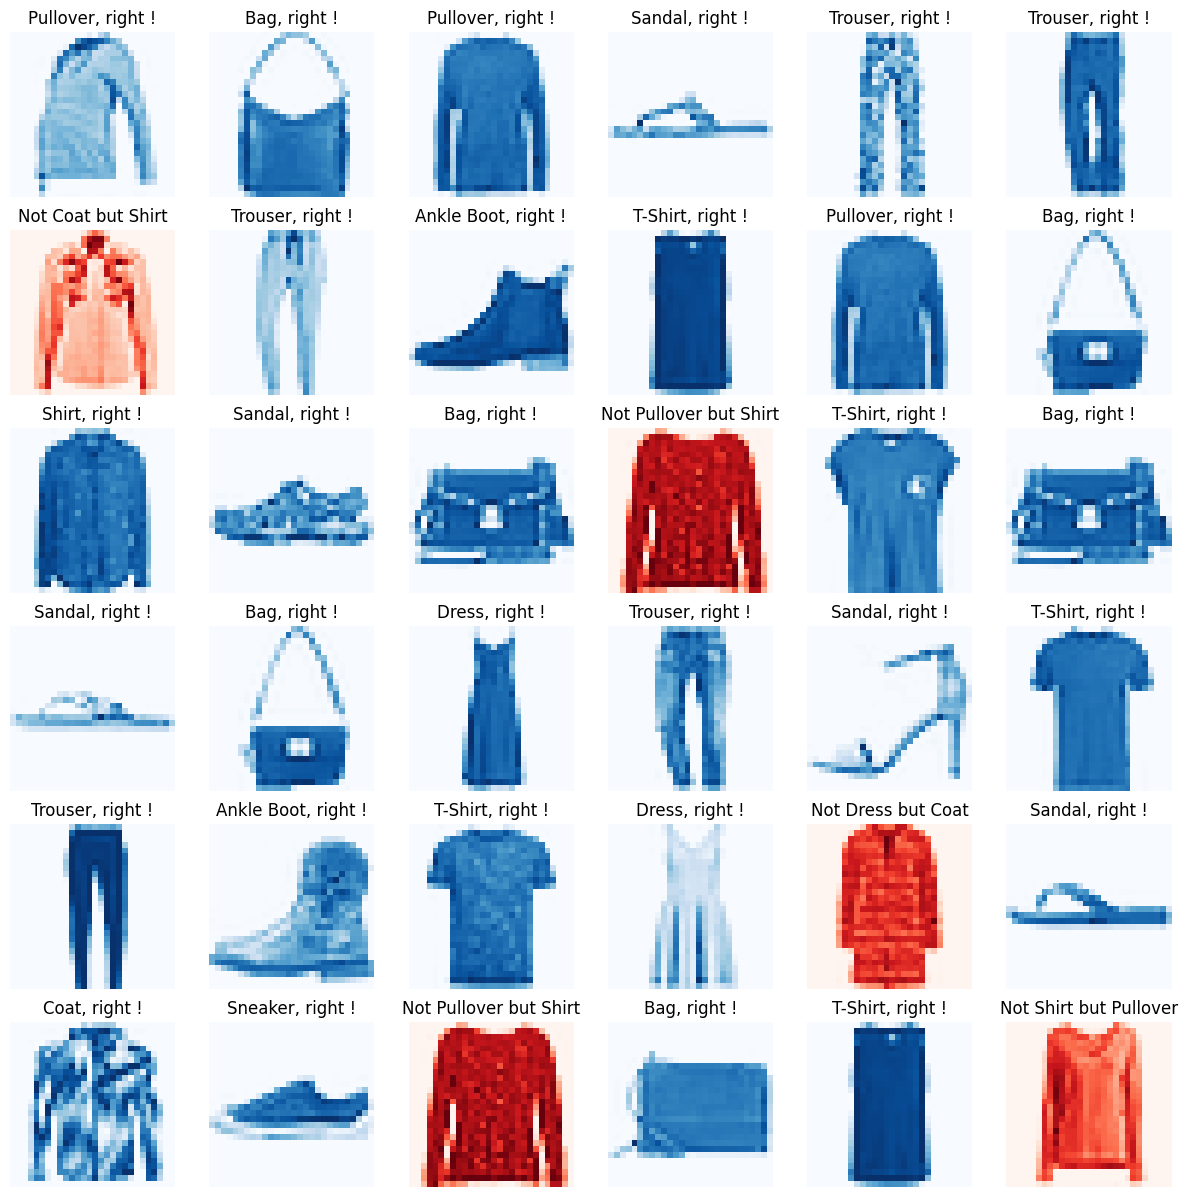

In [233]:
import matplotlib.pyplot as plt
import numpy as np

label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(15,15))

# batch size와 다른사이즈(ex:1개)를 테스트 할경우에는 eval 호출 필요
model.eval()

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(test_dataloader))
    input_img = test_data[data_idx][0].to(device)
    # print(input_img.shape)

    output = model(input_img)
    value, argmax = torch.max(output, 1)
    pred = label_tags[argmax.item()]
    label = label_tags[test_data[data_idx][1]]

    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + ', right !')
        cmap = 'Blues'
    else:
        plt.title('Not ' + pred + ' but ' +  label)
        cmap = 'Reds'
        print(f"value : {value}, argmax : {argmax} \n {output}")

    plot_img = test_data[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')

plt.show()

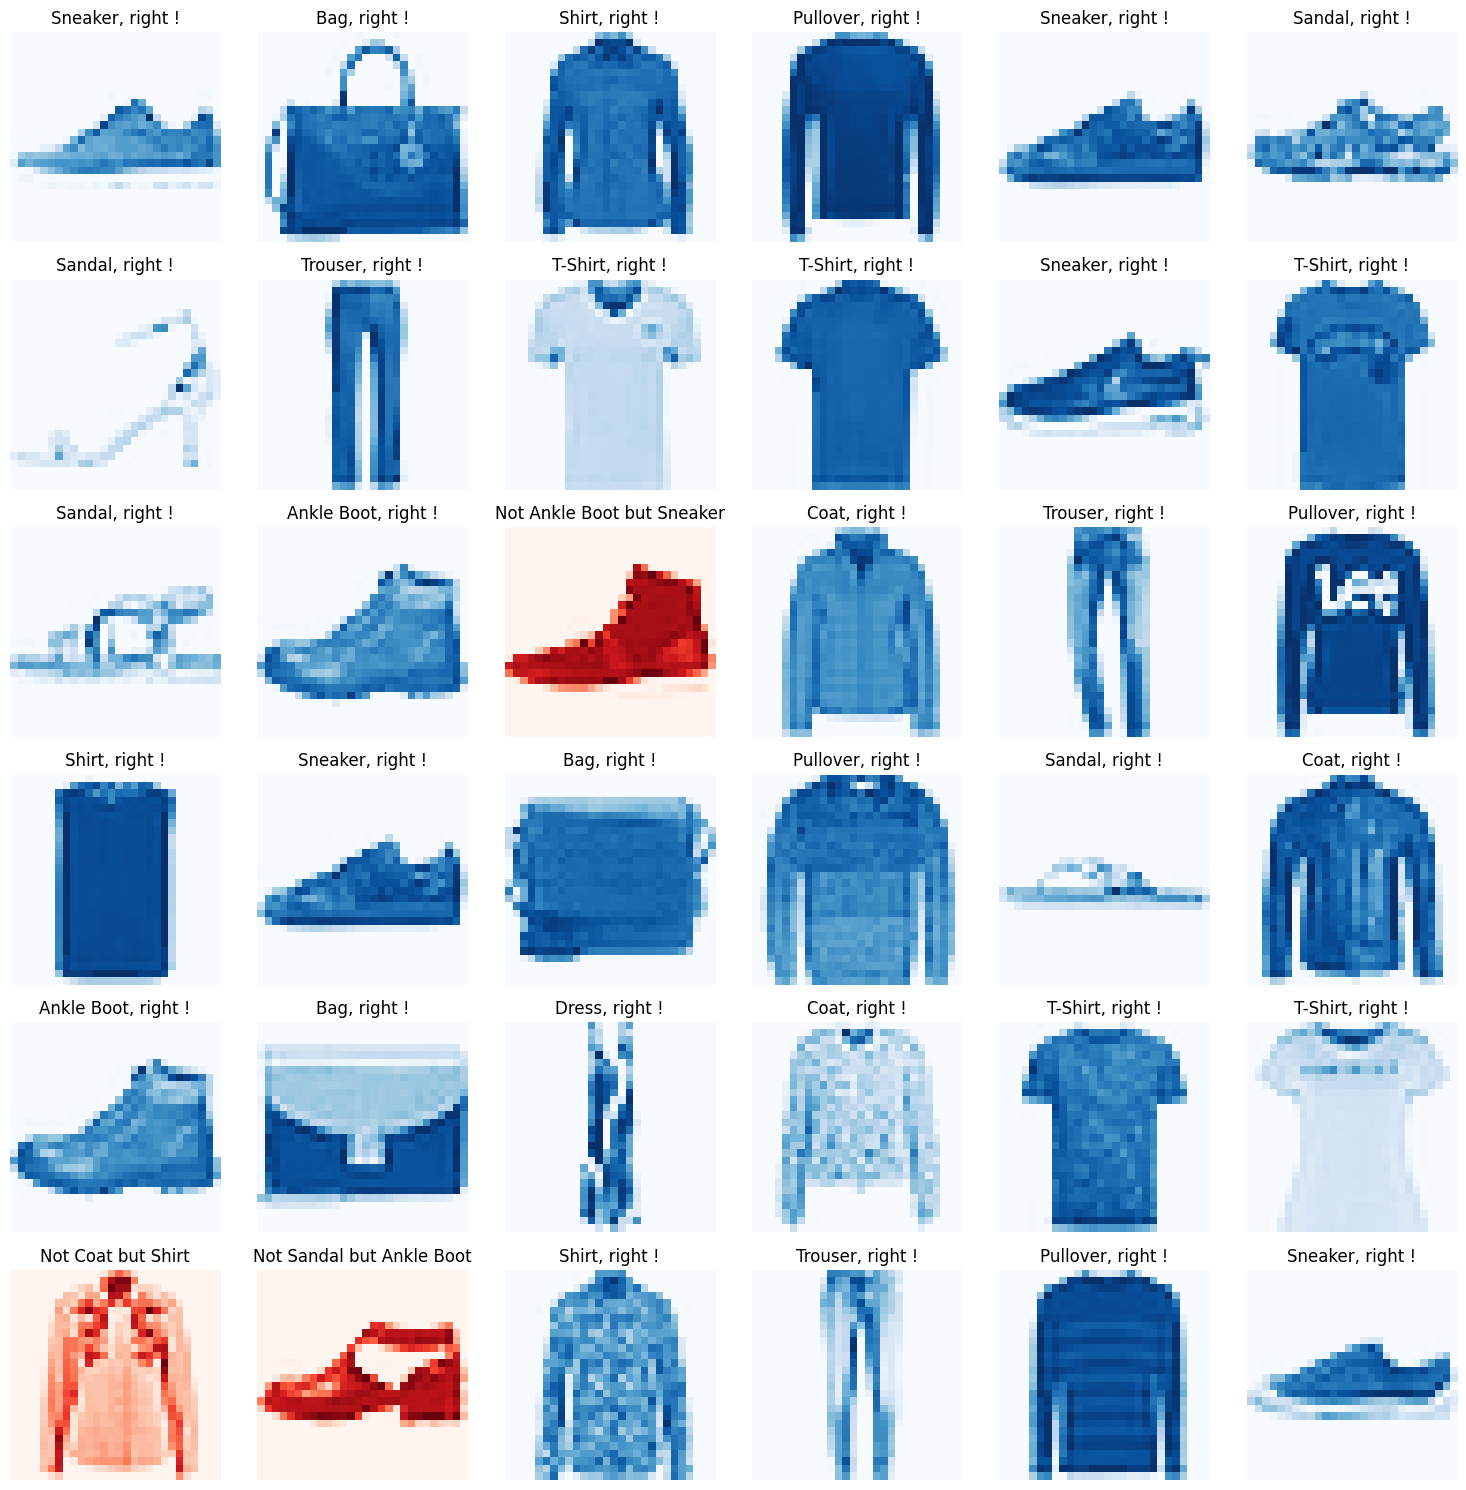

In [234]:
import matplotlib.pyplot as plt
import numpy as np

# 클래스 레이블에 대응하는 태그
label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(15, 15))

# batch size와 다른사이즈(ex:1개)를 테스트 할경우에는 eval 호출 필요
model.eval()  # 모델을 평가 모드로 변경

for i in range(1, columns * rows + 1):
    data_idx = np.random.randint(len(test_dataloader))
    input_img, label = test_data[data_idx][0].to(device), test_data[data_idx][1]

    # 이미지 예측
    with torch.no_grad():
        output = model(input_img)
        _, prediction = torch.max(output, 1)
        pred_class = label_tags[prediction.item()]
        true_class = label_tags[label]

    # 제목과 색상 설정
    title = f'{pred_class}, right !' if pred_class == true_class else f'Not {pred_class} but {true_class}'
    cmap = 'Blues' if pred_class == true_class else 'Reds'

    fig.add_subplot(rows, columns, i)
    plot_img = input_img.squeeze().cpu().numpy()  # 텐서를 넘파이 배열로 변환하여 이미지 플로팅
    plt.imshow(plot_img, cmap=cmap)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [235]:
a = torch.randn(4, 4)
a

tensor([[ 0.3350, -1.2826, -0.3035, -1.8766],
        [ 0.6012,  0.9196, -0.1285, -0.6023],
        [ 0.1235, -0.7782, -0.8200,  0.2000],
        [-0.9626, -0.3242,  1.7381,  0.0896]])

In [236]:
torch.max(a, 1)

torch.return_types.max(
values=tensor([0.3350, 0.9196, 0.2000, 1.7381]),
indices=tensor([0, 1, 3, 2]))

In [237]:
torch.max(a)

tensor(1.7381)

In [238]:
torch.max(a, -1)

torch.return_types.max(
values=tensor([0.3350, 0.9196, 0.2000, 1.7381]),
indices=tensor([0, 1, 3, 2]))

In [239]:
test_data[data_idx][0].shape

torch.Size([1, 28, 28])

In [240]:
input_img.squeeze().shape

torch.Size([28, 28])

In [241]:
output = model(input_img)
print(output)

tensor([[-2.0321, -3.1208, -3.8238, -3.5385, -4.2747, -2.5080, -4.0354,  5.6668,
         -3.8079, -2.7117]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [242]:
torch.max(output, 1)

torch.return_types.max(
values=tensor([5.6668], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([7], device='cuda:0'))